Showing Robot Using Geometry


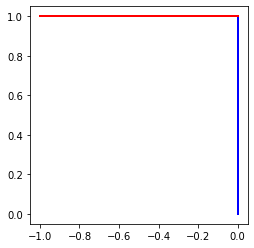

(-0.9999999999999999, 1.0000000000000002)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the joint angles and link lengths
theta1 = np.pi/2
theta2 = np.pi/2
L1 = 1
L2 = 1
def plotRobot(L1, L2, theta1, theta2):
    x1 = L1*np.cos(theta1)
    y1 = L1*np.sin(theta1)
    x2 = x1 + L2*np.cos(theta1+theta2)
    y2 = y1 + L2*np.sin(theta1+theta2)

    fig, ax = plt.subplots()
    ax.plot([0, x1], [0, y1], 'b-', lw=2)  # First link
    ax.plot([x1, x2], [y1, y2], 'r-', lw=2)  # Second link
    ax.set_aspect('equal')
    print("Showing Robot Using Geometry")
    plt.show()
    return x2,y2
GROUND_TRUTH = plotRobot(L1, L2, theta1, theta2)
print(GROUND_TRUTH)

In [4]:
def TP(x,y):
    """
        Prismatic Transformation by x,y
    """
    return np.array([[1,0,x],[0,1,y],[0,0,1]])
def TPx(x):
    return TP(x,0)
def TR(A):
    """
        Resolute Transformation by thetA
    """
    return np.array([[np.cos(A), -np.sin(A), 0],[np.sin(A), np.cos(A), 0],[0,0,1]])

Thinking:
![2d_forward_kinematics_thought_process](assets/2d_forward_kinematics_thought_process.png)
*Step by Step how I got this result*

In [5]:
#Result from the equation (note how we start at the origin)
myResult = TR(theta1)@TPx(L1)@TR(theta2)@TPx(L2)@np.array([0,0,1])
myResult

array([-1.,  1.,  1.])

Showing the Ground Truth with extra rotation dimension

In [6]:
x = list(GROUND_TRUTH) #We add a 1 since the original ground truth doesnt have a rotation dimension
x.append(1)
x

[-0.9999999999999999, 1.0000000000000002, 1]

They are equivalent

In [7]:
np.all(np.isclose(x,myResult))

True

# PyTorch

In [38]:
import torch
import numpy as np

def TP(x,y):
    """
        Prismatic Transformation by x,y
    """
    processed = list()
    for i in [0.0,0.0,x,0.0,1.0,y,0.0,0.0,1.0]:
        if isinstance(i, float):
            processed.append(torch.tensor(i).view(1))
        else:
            processed.append(i.view(1))
    return torch.cat(tuple(processed)).view(3,3)

def TPx(x):
    return TP(x,torch.tensor(0.0))

def TR(A):
    """
        Resolute Transformation by theta
    """
    processed = list()
    for i in [torch.cos(A), -torch.sin(A), 0,torch.sin(A), torch.cos(A), 0,0,0,1]:
        if isinstance(i, (int, float)):
            processed.append(torch.tensor(i).view(1))
        else:
            processed.append(i.view(1))

    return torch.cat(tuple(processed)).view(3,3)

#Result from the equation (note how we start at the origin)
#start = torch.tensor([0.0,0.0,1.0], requires_grad=True).unsqueeze(1)
#myResult = TR(theta1)
#myResult = myResult@TPx(L1)
#myResult = myResult@TR(theta2)@TPx(L2)@start
#myResult

In [39]:
L1 = torch.tensor(1.0, requires_grad=True)

TR(L1)

AttributeError: 'int' object has no attribute 'view'

In [9]:
myResult = myResult.squeeze().detach().numpy()
myResult

array([-1.        ,  0.99999994,  1.        ], dtype=float32)

In [10]:
np.isclose(myResult, x)

array([ True,  True,  True])

In [21]:
def forward_kinematics(theta1,theta2):
    start = torch.tensor([0.0,0.0,1.0]).unsqueeze(1)
    myResult = TR(theta1)
    myResult = myResult@TPx(L1)
    myResult = myResult@TR(theta2)@TPx(L2)@start
    return myResult

In [22]:
theta1 = torch.tensor(0.0, requires_grad=True)
theta2 = torch.tensor(0.0, requires_grad=True)

L1 = torch.tensor(1.0)
L2 = torch.tensor(1.0)

forward_kinematics(theta1,theta2)

tensor([[2.],
        [0.],
        [1.]])